In [1]:
import tensorflow as tf
print(tf.__version__)

2.1.0


In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

11493376/11490434 [==============================] - 4s 0us/step
x_train.shape: (60000, 28, 28)


In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [5]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [6]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 14s 231us/sample - loss: 0.2941 - accuracy: 0.9155 - val_loss: 0.1421 - val_accuracy: 0.9570
Epoch 2/10
60000/60000 [==============================] - 12s 198us/sample - loss: 0.1430 - accuracy: 0.9572 - val_loss: 0.0999 - val_accuracy: 0.9701
Epoch 3/10
60000/60000 [==============================] - 11s 191us/sample - loss: 0.1069 - accuracy: 0.9675 - val_loss: 0.0976 - val_accuracy: 0.9694
Epoch 4/10
60000/60000 [==============================] - 11s 178us/sample - loss: 0.0883 - accuracy: 0.9727 - val_loss: 0.0791 - val_accuracy: 0.9746
Epoch 5/10
60000/60000 [==============================] - 10s 163us/sample - loss: 0.0767 - accuracy: 0.9760 - val_loss: 0.0751 - val_accuracy: 0.9769
Epoch 6/10
60000/60000 [==============================] - 10s 173us/sample - loss: 0.0665 - accuracy: 0.9789 - val_loss: 0.0823 - val_accuracy: 0.9754
Epoch 7/10
60000/60000 [====================

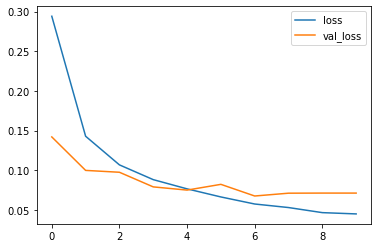

In [7]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

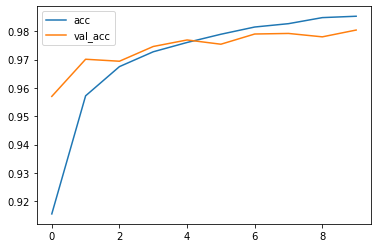

In [8]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [9]:
print(model.evaluate(x_test, y_test))

10000/10000 [==============================] - 2s 158us/sample - loss: 0.0713 - accuracy: 0.9804
[0.0713321253608563, 0.9804]


Confusion matrix, without normalization
[[ 971    0    1    1    1    1    2    1    2    0]
 [   0 1127    3    0    0    1    1    1    2    0]
 [   6    2 1005    2    1    0    3    9    4    0]
 [   0    0    5  992    0    3    0    6    3    1]
 [   1    0    0    0  971    0    5    2    1    2]
 [   2    0    0   10    2  872    1    1    4    0]
 [   3    2    0    1    3    3  945    0    1    0]
 [   2    4    7    1    0    0    0 1010    1    3]
 [   3    0    2    4    4    5    2    5  947    2]
 [   3    3    0    8   14    2    1    6    8  964]]


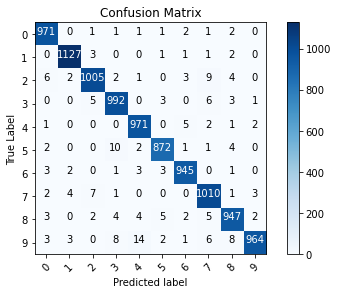

In [12]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")
        
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i,j], fmt), horizontalalignment='center', color='white' if cm[i,j] > thresh else 'black')
        
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted label')
    plt.show()
    
p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

Text(0.5, 1.0, 'True label: 7 Predicted: 2')

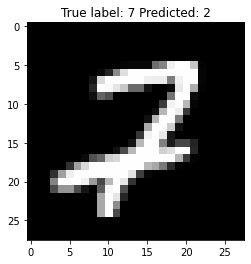

In [17]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title('True label: %s Predicted: %s' % (y_test[i], p_test[i]))